In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from calibration import lifetime_to_temperature_201112
from scipy.optimize import curve_fit
import seaborn as sns
from PIL import Image
import scipy as sp
import cv2

In [2]:
#PATHの読み込み
intensity_path = []
lifetime_path = []
files = glob.glob('../../Fig5/Fig5a/Heat_relaxation_reconstruction/201227_2_IRheating_reconstruction/200mW_5.0sec_cyto_5/*')
files.sort()
for file in files:
    path = glob.glob(file + '/*ch00.tif')
    path.sort()
    intensity_path += path
    path = glob.glob(file + '/*ch01.tif')
    path.sort()    
    lifetime_path += path

In [3]:
#IRレーザーがoffになるタイミングを探す
off_index = []
int_mean = []

for files in intensity_path:


    #加熱中心の強度変化
    int_image = np.array(Image.open(files))
    mean = np.mean(int_image)
    int_mean.append(mean)

diff = np.array(int_mean)[:-1] - np.array(int_mean)[1:]

#体裁調整
plt.figure(figsize = (12, 12))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams["font.size"] = 20

off_index = pd.DataFrame(diff)
off_index = np.ravel(off_index[off_index[0] > 3].index)

'''
plt.plot(diff)
plt.plot(int_mean)
plt.show()
'''

off_index_corrected = []
for index in off_index:
    max_index = pd.DataFrame(diff)[index - 5: index + 5][0].idxmax()
    off_index_corrected.append(max_index)
off_index_corrected = pd.DataFrame(off_index_corrected).drop_duplicates()[0]


<Figure size 864x864 with 0 Axes>

In [4]:
off_index_corrected

0      240
2      479
4      727
6      969
8     1212
10    1453
11    1825
13    2073
15    2311
17    2559
Name: 0, dtype: int64

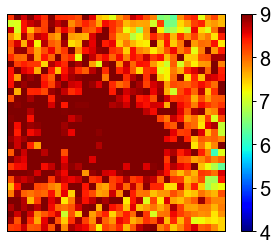

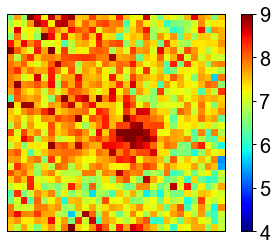

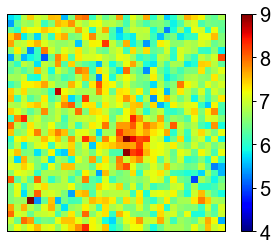

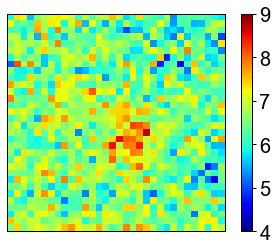

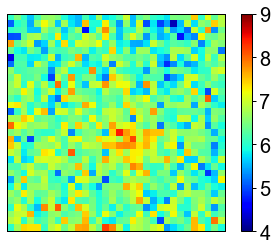

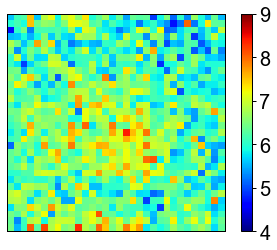

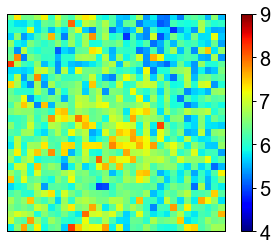

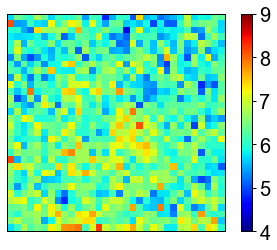

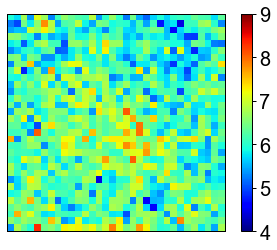

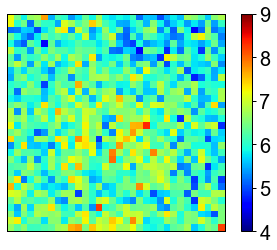

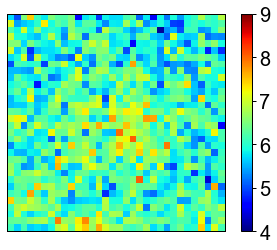

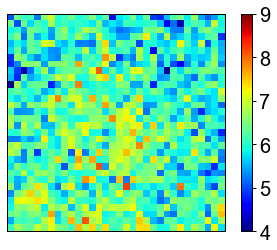

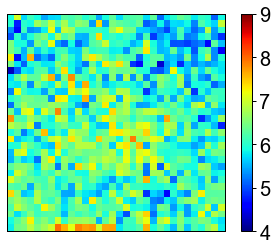

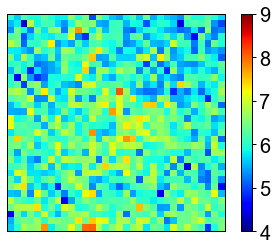

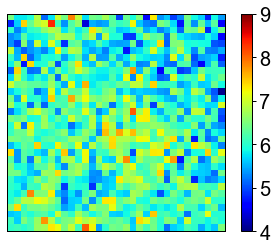

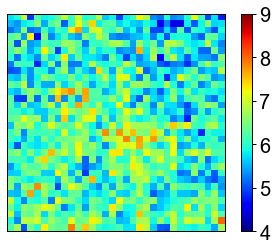

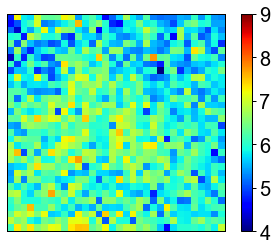

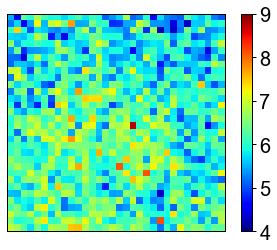

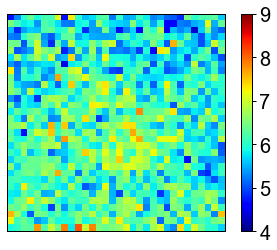

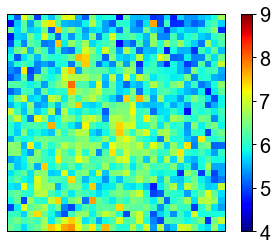

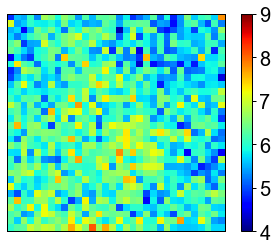

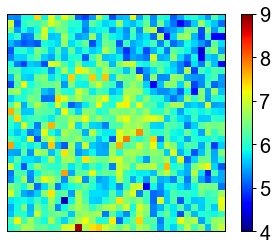

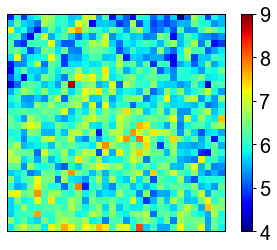

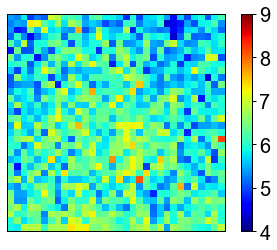

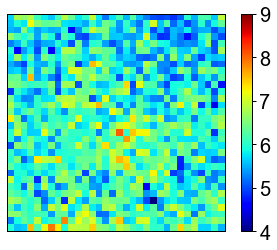

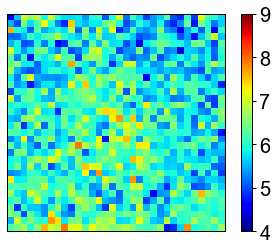

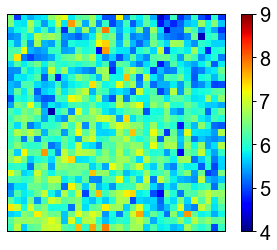

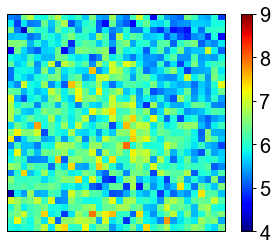

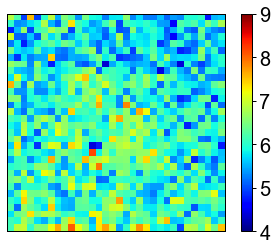

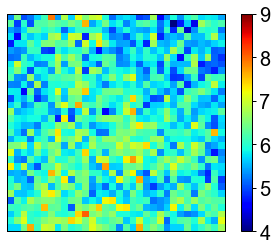

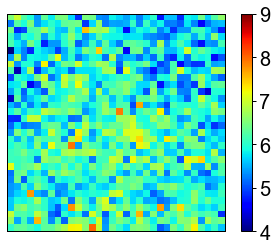

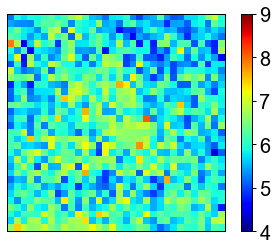

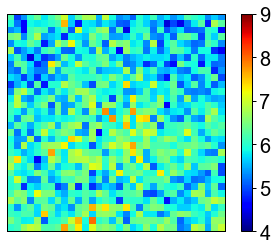

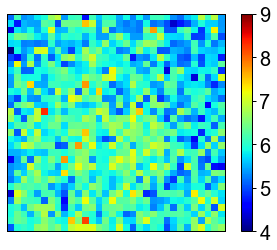

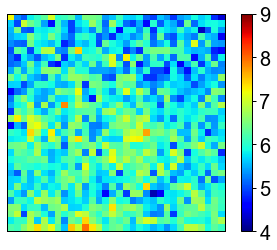

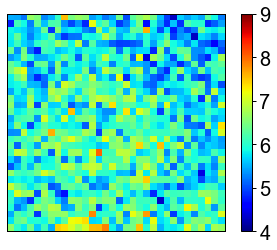

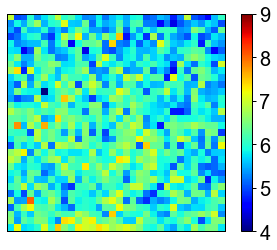

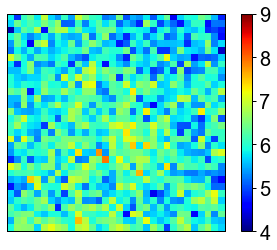

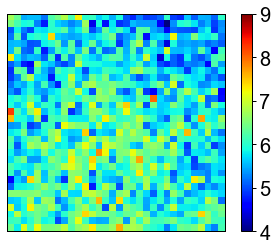

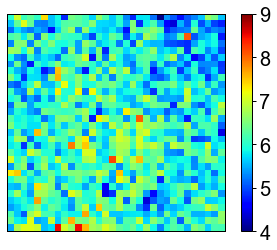

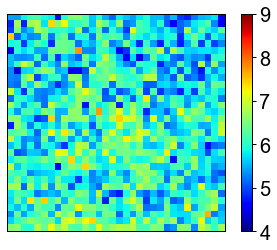

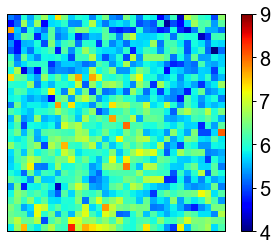

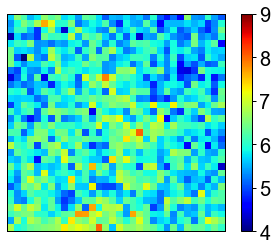

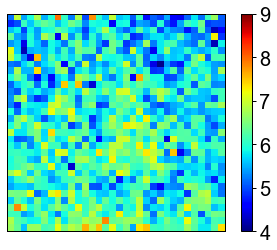

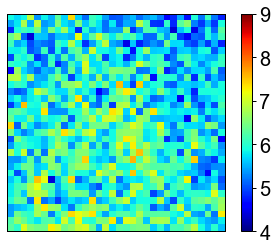

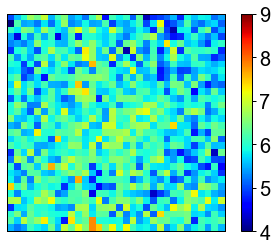

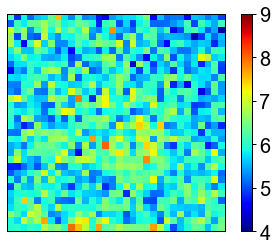

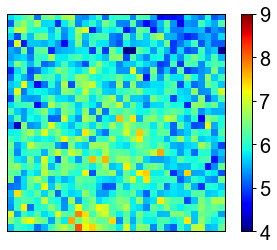

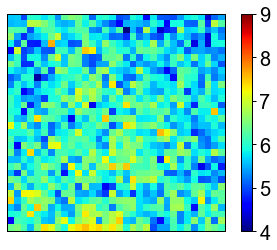

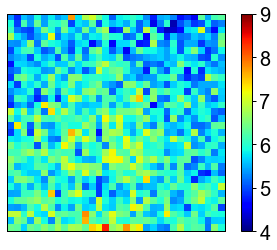

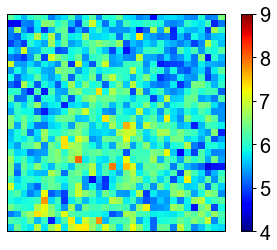

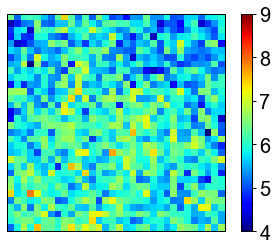

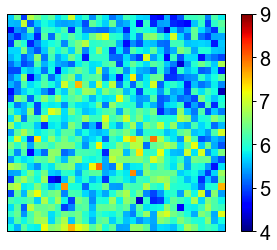

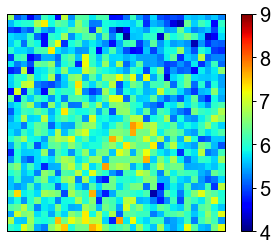

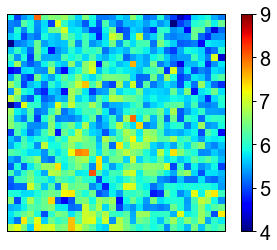

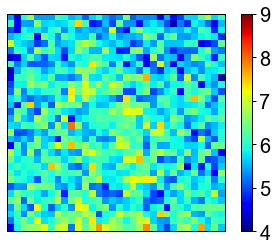

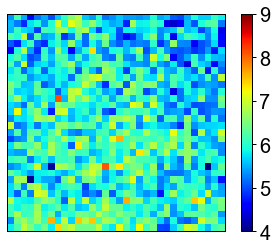

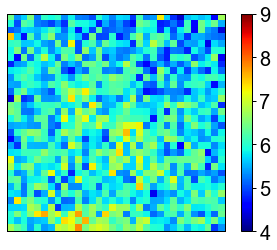

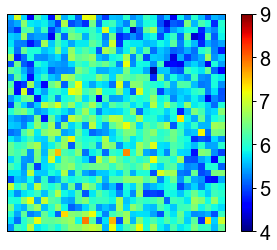

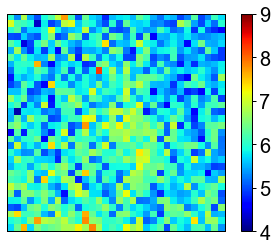

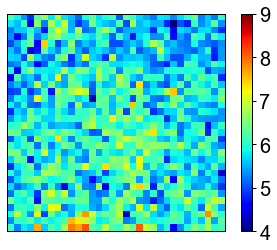

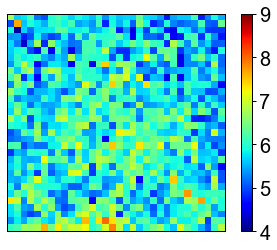

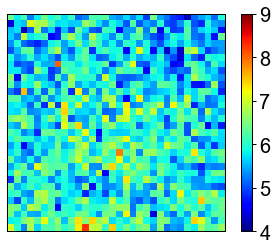

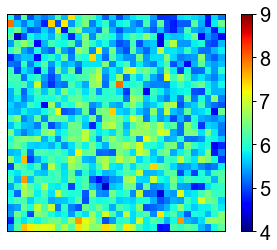

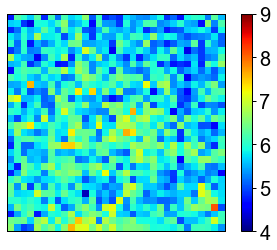

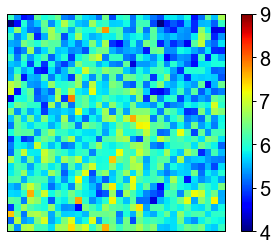

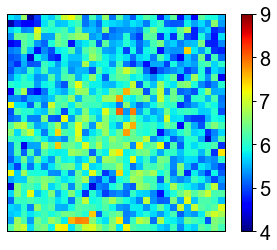

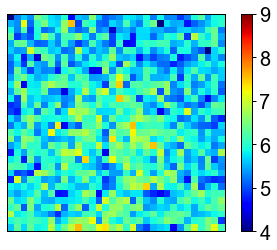

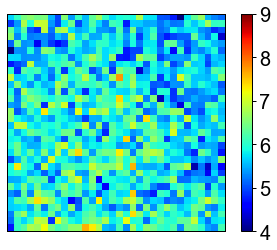

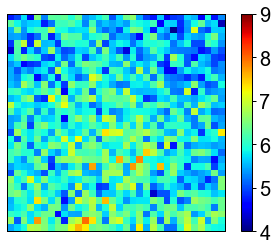

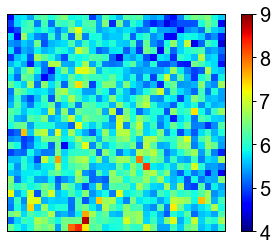

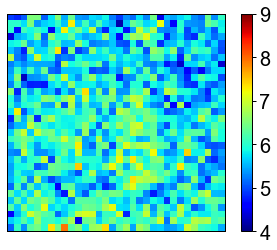

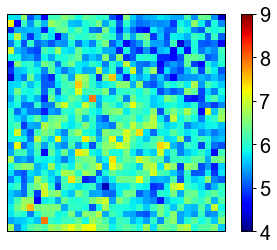

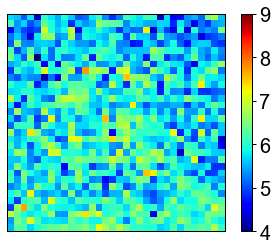

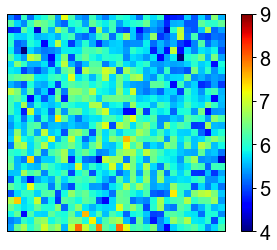

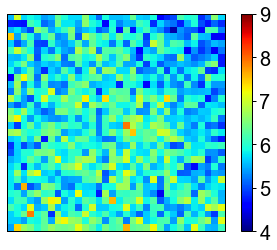

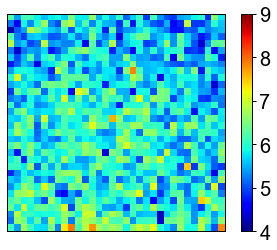

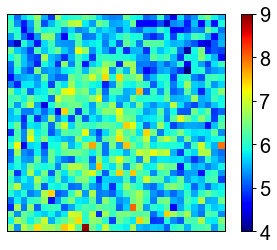

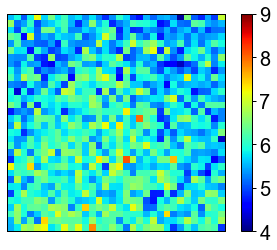

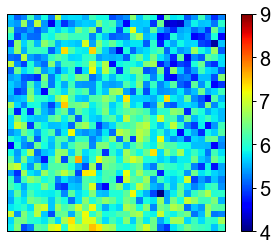

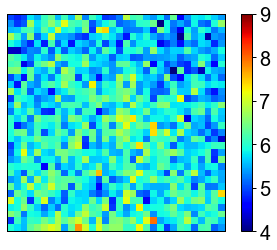

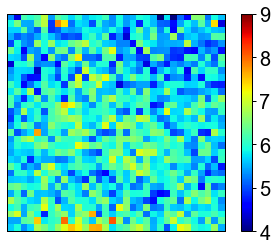

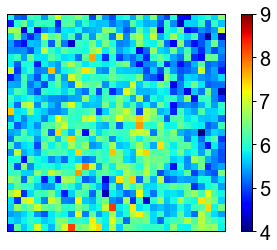

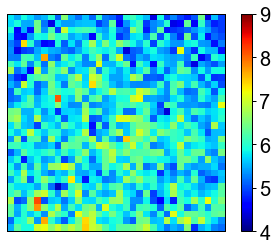

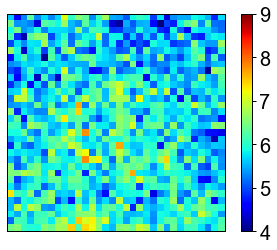

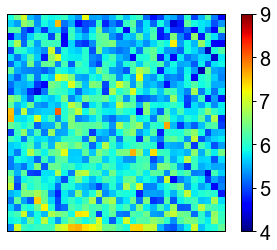

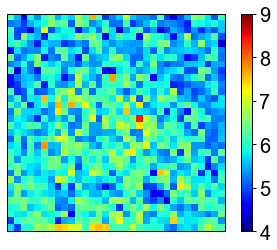

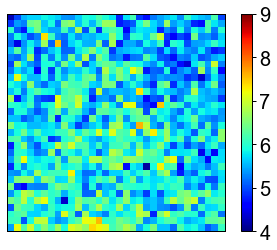

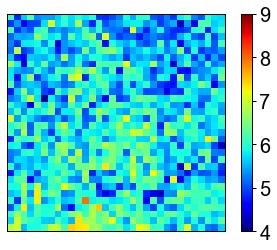

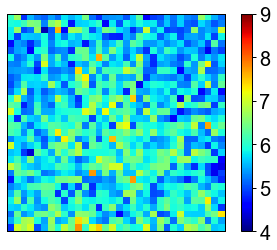

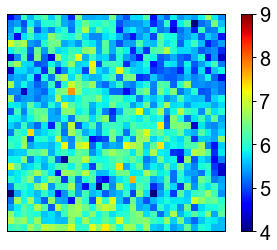

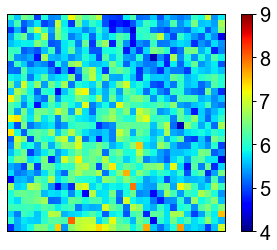

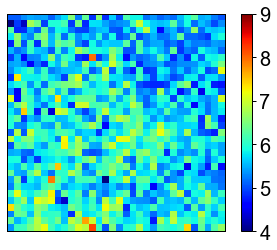

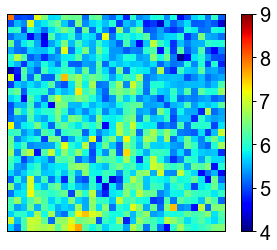

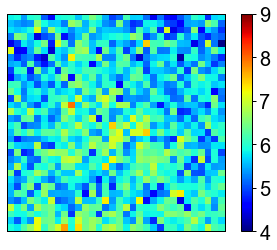

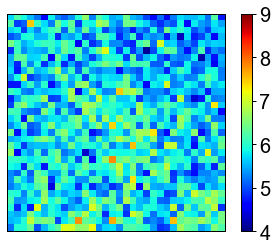

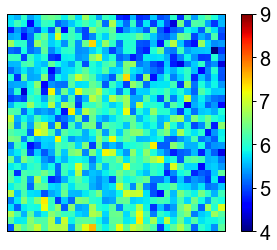

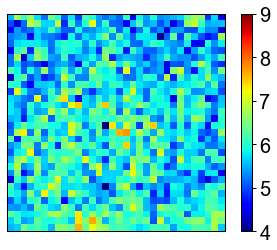

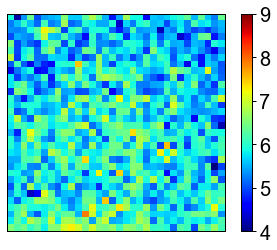

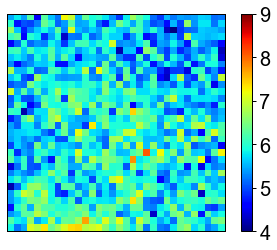

In [5]:
#細胞全体で温度の緩和を見る
frame = 1
for fix_time in range(0, 100):
    lifetime_image = np.zeros((32, 32))
    intensity_image = np.zeros((32, 32))
    for index in off_index_corrected[:-1]:
        time = index + fix_time
        path_tmp_lifetime = lifetime_path[time]
        path_tmp_intensity = intensity_path[time]
        lifetime_image += np.array(Image.open(path_tmp_intensity))*(np.array(Image.open(path_tmp_lifetime))/1000)
        intensity_image += np.array(Image.open(path_tmp_intensity))
    lifetime_image = lifetime_image/intensity_image
    im = Image.fromarray(lifetime_image)
    im.save('../../Fig5/Fig5a/cyto/cyto10/' + str(frame).zfill(3) + '.tif')
    
    #体裁調整

    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['xtick.major.width'] = 1.0
    plt.rcParams['ytick.major.width'] = 1.0
    plt.rcParams['axes.linewidth'] = 1.0
    plt.rcParams["font.size"] = 20
    plt.tick_params(labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False)
    plt.tick_params(bottom=False,
                    left=False,
                    right=False,
                    top=False)
    
    plt.imshow(lifetime_image, vmin = 4, vmax = 9, cmap = 'jet')
    plt.colorbar()
    plt.show()
    frame += 1